# 📊 Exploratory Data Analysis (EDA)

This section explores the structure, quality, and patterns in the SECOM dataset, including missing values, distributions, and feature relationships.

In [323]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the mood
sns.set(style="whitegrid")

# Load dataset
X = pd.read_csv("../data/secom_features.csv")
y = pd.read_csv("../data/secom_labels.csv", header=None, names=["label"])

# Combine features and labels into one DataFrame for convenience
df = X.copy()
df["label"] = y["label"]

## 🔍 Dataset Overview

Look at the size and structure of the dataset.


In [324]:
print("Shape of features:", X.shape)
print("Shape of labels:", y.shape)
df.head()

Shape of features: (1567, 590)
Shape of labels: (1568, 1)


,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,label
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,0
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,-1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


## 🧼 Missing Values

Missing values are common in manufacturing data. Let's identify which features have the most missing values.

     Missing Count  Missing %
292           1429  91.193363
293           1429  91.193363
158           1429  91.193363
157           1429  91.193363
492           1341  85.577537
85            1341  85.577537
358           1341  85.577537
220           1341  85.577537
244           1018  64.964901
517           1018  64.964901


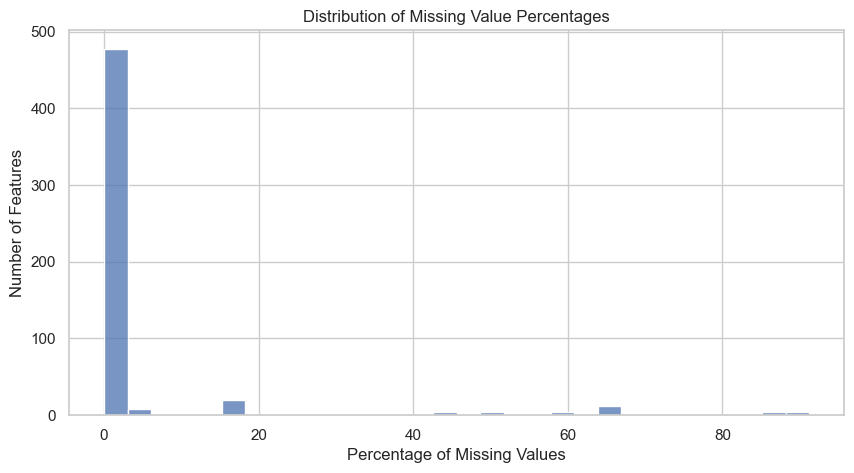

In [325]:
missing_counts = X.isnull().sum()
missing_pct = (missing_counts / len(X)) * 100 #Percentage of missing values per column
missing_df = pd.DataFrame({ #Create dataframe
    'Missing Count': missing_counts,
    'Missing %': missing_pct
}).sort_values(by='Missing %', ascending=False)

#Display the features with the highest percentage of missing values
print(missing_df[missing_df["Missing Count"] > 0].head(10))

#Plot the distribution of missing data
plt.figure(figsize=(10, 5))
sns.histplot(missing_pct[missing_pct > 0], bins=30, kde=False)
plt.title("Distribution of Missing Value Percentages")
plt.xlabel("Percentage of Missing Values")
plt.ylabel("Number of Features")
plt.show()

### Missing Data Summary

The vast majority of features in the dataset have less than 5% missing values, as shown in the histogram. This suggests that missing data is relatively sparse and localized. Only a few features show moderate to high levels of missing values, potentially due to sensor failures or non-operational stages in the manufacturing process. These features will be considered for either imputation or removal during preprocessing (i.e. 292, 293).

## 🏷️ Label Distribution

The label column indicates whether the product passed (1) or failed (-1) quality control. We'll inspect how balanced this target variable is.

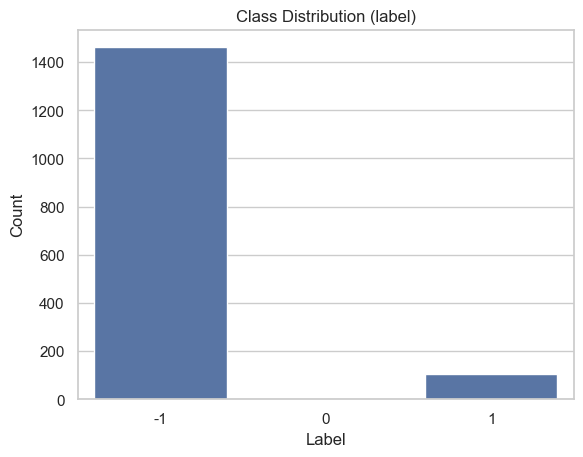

label
-1    0.932993
 1    0.066369
 0    0.000638
Name: proportion, dtype: float64


In [326]:
sns.countplot(x="label", data=df)
plt.title("Class Distribution (label)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

print(df["label"].value_counts(normalize=True))

### Label Distribution Summary

The dataset is highly imbalanced, with approximately 93% of samples labeled as non-defective (-1) and only around 6.6% labeled as defective (1). This significant class imbalance could impact model performance, especially in detecting rare defective cases — which are often the most critical in manufacturing.

Additionally, a very small proportion (~0.06%) of the data is labeled as 0, which may represent mislabeled or ambiguous entries. These should be investigated further or removed before training a classifier.

To address the imbalance, techniques such as class weighting, SMOTE (oversampling), or anomaly detection models may be considered during modeling.

## 📈 Feature Variance

We’ll identify any features that have no variability — i.e., the same value across all rows. These features carry no useful information for modeling.

In [327]:
# Calculate standard deviation for each column
feature_variances = X.std()

# Count how many have zero or near-zero variance
zero_var = (feature_variances == 0).sum()
print(f"Number of features with zero variance: {zero_var}")

# Create a variable for low/zero variance features and display
low_var_features = feature_variances[feature_variances == 0]
low_var_features

Number of features with zero variance: 116


5      0.0
13     0.0
42     0.0
49     0.0
52     0.0
      ... 
534    0.0
535    0.0
536    0.0
537    0.0
538    0.0
Length: 116, dtype: float64

### Feature Variance Summary

A total of 116 features in the dataset exhibit zero variance. These features do not contribute any discriminative information for modeling, as they cannot help differentiate between defective and non-defective units.

Such features are typically the result of:
- Disabled sensors
- Static process parameters
- Data collection issues

They will be removed prior to modeling to reduce noise and improve computational efficiency.

## 🔗 Feature Correlation

To understand redundancy in features, we examine correlations between a random subset of features.

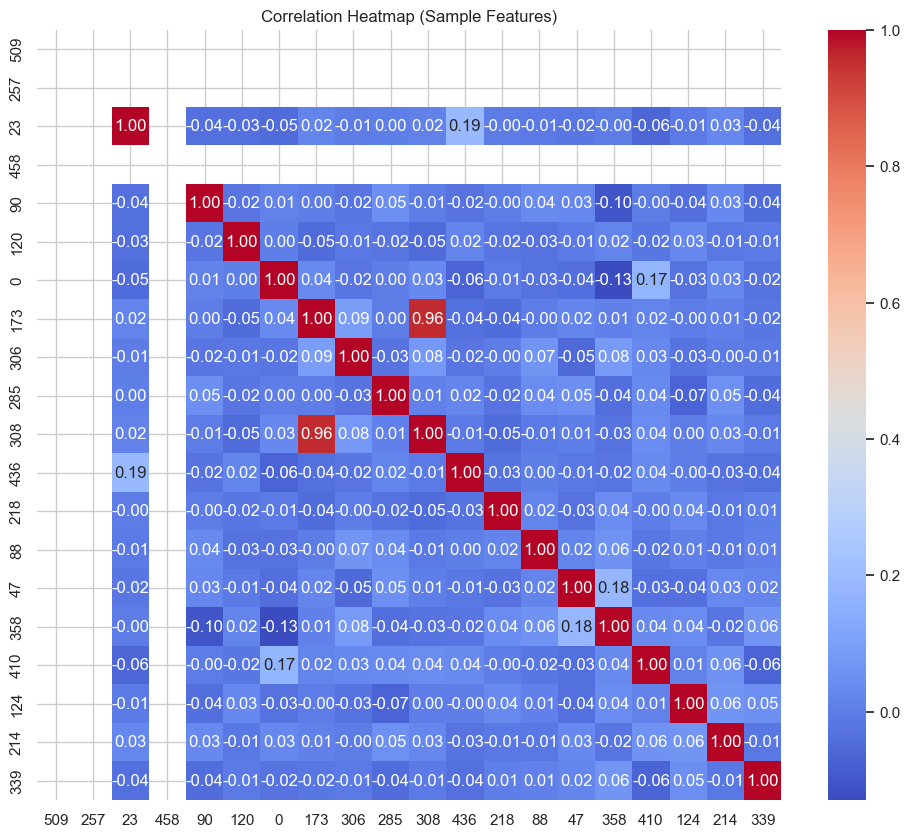

In [328]:
# Sample 20 random columns to plot correlations
sample_cols = X.sample(n=20, axis=1, random_state=1)
corr = sample_cols.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Sample Features)")
plt.show()

### Feature Correlation Summary

A heatmap of 20 randomly selected features reveals several strong positive and negative correlations, indicating that some sensors are likely measuring related or redundant aspects of the manufacturing process.

Notably sensors 173 and 308 appear strongly correlated, which may correspond to a cluster of temperature or pressure sensors within the same process step.

Highly correlated features may:
- Represent **redundant signals** (e.g., multiple sensors in the same tool or step),
- Capture **derived or smoothed versions** of other sensor outputs,
- Or be influenced by the same underlying process conditions.

While correlation does not always imply redundancy for modeling, highly correlated features can lead to multicollinearity in some models (e.g., linear regression) and may reduce interpretability. Dimensionality reduction techniques (e.g., PCA) or feature selection can be considered to address this. 

This early correlation check also helps identify potential **clusters of interrelated sensors**, which may be relevant in downstream analysis or root cause investigation.

## 🧭 Feature Distributions and Outliers

To better understand sensor behavior, we’ll visualize a few sensor columns. This helps us detect skewed distributions, outliers, and possible need for scaling or transformation.


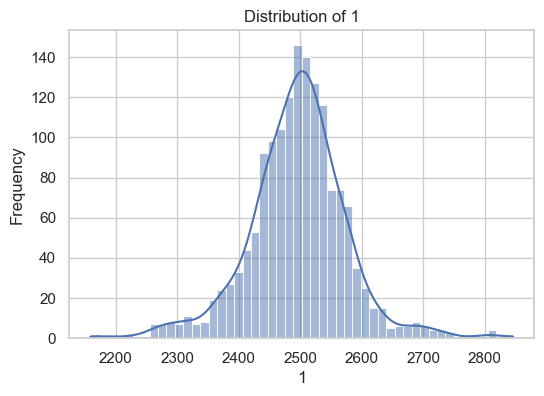

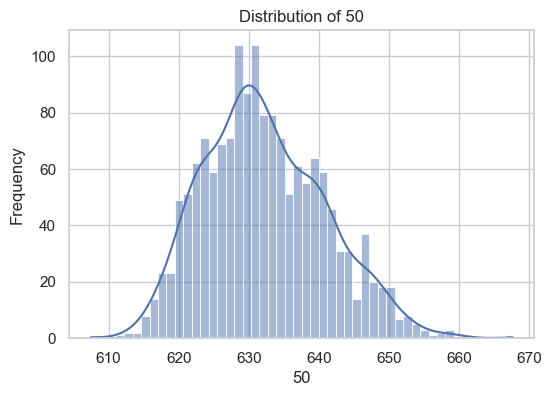

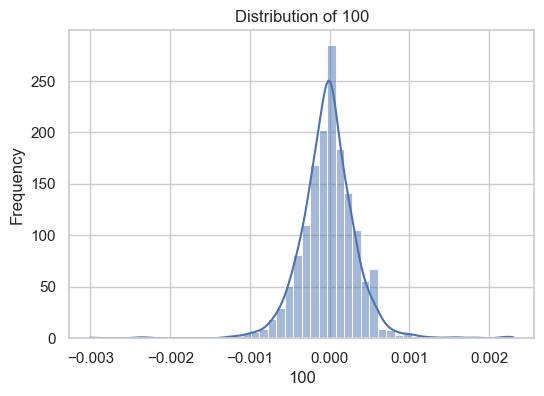

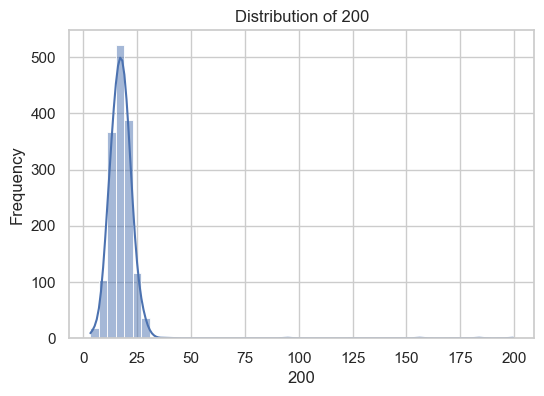

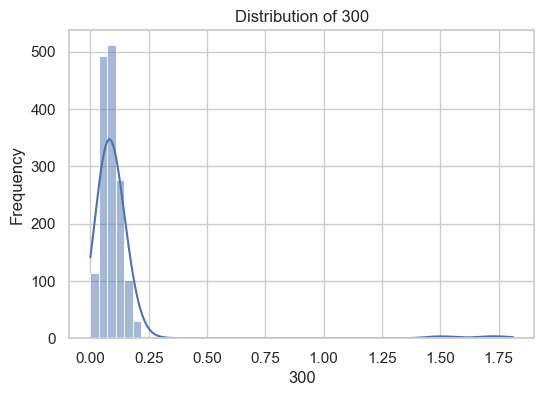

In [329]:
# Plot histograms for a few selected features

sample_cols = ["1", "50", "100", "200", "300",] 

for col in sample_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(X[col].dropna(), bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

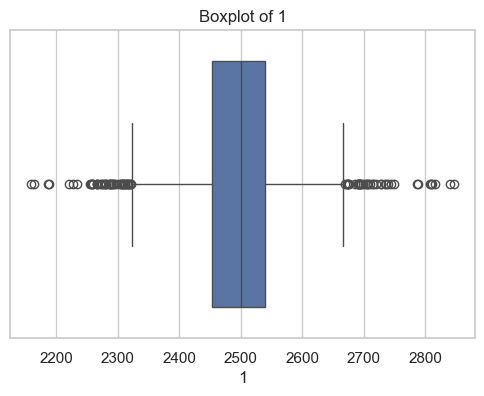

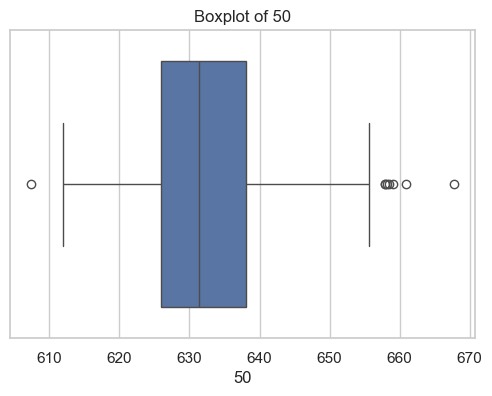

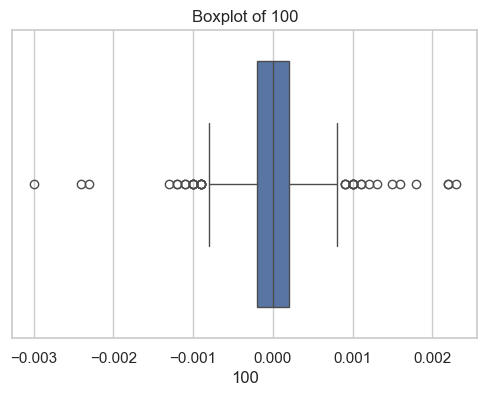

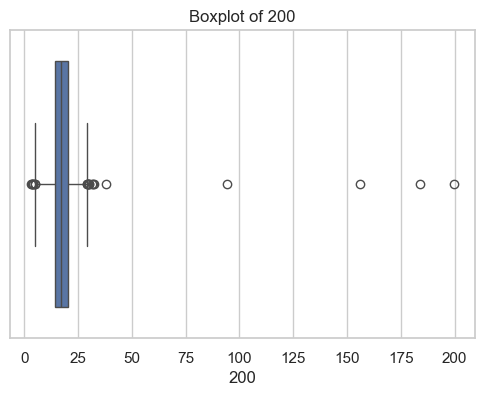

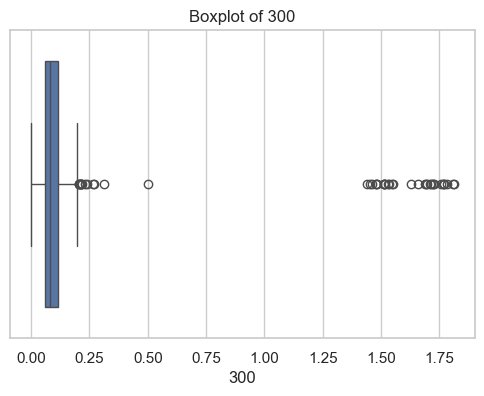

In [330]:
# Make boxplots for the same columns to show grouping and extreme outliers
for col in sample_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=X[col].dropna())
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()


### Feature Distributions and Outliers

Five selected features were visualized using histograms and boxplots to assess their distributions and identify potential outliers.

- **Histograms** revealed that most of the chosen features exhibit non-normal, often skewed distributions — common in sensor data due to process limits or control feedback mechanisms.
- **Boxplots** highlighted that several features contain significant outliers, which may correspond to rare process excursions or sensor noise.

While some level of outlier presence is expected in manufacturing environments, extreme values may affect model performance and skew statistical metrics. These will be reviewed for potential treatment, such as capping, transformation, or removal.

Unfortunately I am a novice to the semiconductor manufacturing process so I dont understand the underlying nature of these features. Understanding the nature and extent of outliers is essential for robust model training, especially when working with imbalanced labels where edge cases are critical.

# 🧼 Data Preprocessing

This section covers the necessary preprocessing steps to prepare the dataset for modeling. These steps include removing zero-variance features, handling missing values, and encoding the target labels.


### Removing Zero-Variance Features

Features with zero variance provide no useful information for classification and can be safely removed to reduce dimensionality and improve model performance.

In [331]:
from sklearn.feature_selection import VarianceThreshold

# Drop features with zero variance
selector = VarianceThreshold(threshold=0.0)
X_reduced = selector.fit_transform(X)

# Get the list of retained features
retained_columns = X.columns[selector.get_support()]
X = pd.DataFrame(X_reduced, columns=retained_columns)

### Dropping Features with High Missingness

Features with excessive missing values can reduce model robustness and lead to unreliable imputations. In this step, features with more than 30% missing values are removed prior to imputation.

In [332]:
# Set missing data threshold
missing_threshold = 0.3  # 30%

# Calculate missing percentages
missing_pct = X.isnull().mean()

# Keep only features below threshold
X = X.loc[:, missing_pct < missing_threshold]

### Handling Missing Values

Missing values are imputed using a simple strategy (e.g., mean imputation) to ensure completeness of the dataset before model training.

In [333]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

X = pd.DataFrame(X_imputed, columns=X.columns)

### Encoding Target Labels

The target labels are mapped to binary values suitable for classification, with `1` representing defective units and `0` representing non-defective ones. Samples with ambiguous labels (e.g., `0`) are removed.

In [334]:
# Remove ambiguous label (0)
df = df[df['label'] != 0]

# Extract and encode target changing the -1s to 0s
y = df['label'].map({-1: 0, 1: 1})
X = df.drop('label', axis=1)

### Feature Scaling

Feature scaling ensures that all features contribute equally to model training by standardizing their ranges. In this step, features are scaled using StandardScaler to have zero mean and unit variance.


In [335]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame to preserve column names
X = pd.DataFrame(X_scaled, columns=X.columns)

### Train-Test Split

The dataset is split into training and test sets to evaluate model performance on unseen data. A typical 80/20 split is used, with stratification to maintain label proportions in both sets.

In [336]:
from sklearn.model_selection import train_test_split

# Split into train and test sets with stratified labels
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Removing Highly Correlated Features

Highly correlated features can introduce redundancy and multicollinearity, which may negatively impact certain models. In this step, features with a correlation coefficient above a defined threshold (e.g., 0.95) are removed to retain only one representative from each correlated group.

In [337]:
# Calculate correlation matrix
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation above threshold
correlation_threshold = 0.95 #messed around with this value .9-.95
to_drop = [column for column in upper.columns if any(upper[column] > correlation_threshold)]
print(to_drop) #Display columns to be removed
print(len(to_drop))
# Drop highly correlated features from train and test sets
X_train = X_train.drop(columns=to_drop)
X_test = X_test.drop(columns=to_drop)

['27', '36', '96', '104', '105', '106', '127', '140', '148', '152', '165', '174', '206', '209', '249', '252', '271', '272', '274', '275', '277', '279', '280', '281', '282', '283', '285', '286', '287', '288', '289', '290', '291', '292', '293', '294', '295', '296', '297', '298', '299', '300', '301', '302', '303', '304', '305', '306', '307', '308', '309', '310', '311', '312', '317', '318', '319', '320', '321', '323', '324', '331', '332', '333', '334', '335', '338', '339', '340', '341', '342', '343', '344', '346', '347', '348', '349', '350', '351', '352', '353', '354', '355', '356', '357', '359', '360', '361', '362', '363', '365', '366', '376', '377', '382', '383', '386', '387', '388', '389', '390', '391', '392', '393', '405', '406', '407', '408', '409', '410', '411', '415', '416', '417', '420', '421', '424', '425', '426', '427', '428', '429', '434', '435', '436', '437', '440', '441', '442', '443', '444', '445', '446', '447', '448', '452', '453', '454', '455', '456', '457', '459', '467', '

> **Note:** A correlation threshold of 0.95 was used to remove highly redundant features. Despite the conservative threshold, 194 features were dropped, indicating significant multicollinearity in the dataset. This reduction improves model stability and interpretability.


# 🤖 Baseline Model: Random Forest Classifier

A Random Forest classifier is used as the baseline model due to its ability to handle high-dimensional data, resistance to multicollinearity, and built-in feature importance metrics. This model also provides robust performance without requiring extensive parameter tuning.


In [338]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Step 1: Impute missing values in training data
imputer = SimpleImputer(strategy='mean')  # or 'median' depending on your data
X_train_imputed = imputer.fit_transform(X_train)

# Step 2: Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train)

# Check new class distribution
print(pd.Series(y_train_resampled).value_counts())

label
0    1169
1    1169
Name: count, dtype: int64


In [339]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train model on resampled data
rf = RandomForestClassifier(
    random_state=42,
    class_weight={0: 1, 1:10}, #assign more weight to class 1 to balance recall and precision
    n_jobs=-1)
rf.fit(X_train_resampled, y_train_resampled)

# Predict on original test set
y_pred = rf.predict(X_test)

# Evaluate
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4, zero_division=0))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0     0.9379    0.9795    0.9583       293
           1     0.2500    0.0952    0.1379        21

    accuracy                         0.9204       314
   macro avg     0.5940    0.5374    0.5481       314
weighted avg     0.8919    0.9204    0.9034       314

Confusion Matrix:
[[287   6]
 [ 19   2]]


c:\Users\Piano\secom-yield-analysis\.venv\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


### 🌲 Random Forest with Class Weighting + SMOTE

To handle the heavy class imbalance, I used **SMOTE** to oversample the minority class and then trained a **Random Forest classifier** with adjusted class weights. I tried a few different weight settings, and the best results came from:

`class_weight = {0: 1, 1: 10}`

This helped the model pay more attention to class `1`, which represents the minority (defective) cases.

#### ✅ Results:
- **Accuracy**: 92.0%
- **Class 1 Precision**: 25%
- **Class 1 Recall**: 9.5%
- **F1 Score (Class 1)**: 13.8%

#### 🧱 Confusion Matrix:
- [[287 6] ← Class 0 (normal)
- [ 19 2]] ← Class 1 (defective)

This setup gave the best balance so far — recall is still low, but precision improved without hurting accuracy too much. Next steps will be trying other models (like XGBoost) or adjusting the decision threshold to boost recall.